In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os
from datetime import datetime
#---------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split 
#---------------------------------------------------
start=datetime.now()

#---------------------------------------------------
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target
#---------------------------------------------------
# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
# 請使用sklearn.datasets.load_digits()
#---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#---------------------------------------------------

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=100, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], X_train.shape[1]).astype('float32')  
X_test_2D = X_test.reshape(X_test.shape[0], X_test.shape[1]).astype('float32')  

x_Train_norm = X_train_2D/1 #255
x_Test_norm = X_test_2D/1   #255

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
X.shape

(1797, 64)

In [3]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Train on 1149 samples, validate on 288 samples
Epoch 1/50
 - 0s - loss: 2.3048 - accuracy: 0.2019 - val_loss: 1.8383 - val_accuracy: 0.4653
Epoch 2/50
 - 0s - loss: 1.5827 - accuracy: 0.5770 - val_loss: 1.2959 - val_accuracy: 0.6736
Epoch 3/50
 - 0s - loss: 1.0980 - accuracy: 0.7937 - val_loss: 0.8930 - val_accuracy: 0.8229
Epoch 4/50
 - 0s - loss: 0.7710 - accuracy: 0.8912 - val_loss: 0.6481 - val_accuracy: 0.8715
Epoch 5/50
 - 0s - loss: 0.5693 - accuracy: 0.8973 - val_loss: 0.5036 - val_accuracy: 0.8785
Epoch 6/50
 - 0s - loss: 0.4336 - accuracy: 0.9234 - val_loss: 0.4122 - val_accuracy: 0.9062
Epoch 7/50
 - 0s - loss: 0.3424 - accuracy: 0.9373 - val_loss: 0.3512 - val_accuracy: 0.9097
Epoch 8/50
 - 0s - loss: 0.2826 - accuracy: 0.9469 - val_loss: 0.3071 - val_accuracy: 0.9132
Epoch 9/50
 - 0s - loss: 0.2402 - accuracy: 0.9539 - val_loss: 0.2779 - val_accuracy: 0.9201
Epoch 10/50
 - 0s - loss: 0.2085 - accuracy: 0.9565 - val_loss: 0.2537 - val_accuracy: 0.9236
Epoch 11/50
 - 0s - lo

In [8]:
# InternalError:  Blas GEMM launch failed : a.shape=(200, 64), b.shape=(64, 100), m=200, n=100, k=64
# 	 [[node dense_4/MatMul (defined at c:\python37\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_908]

# Function call stack:
# keras_scratch_graph
X.min(), X.max()

(0.0, 16.0)

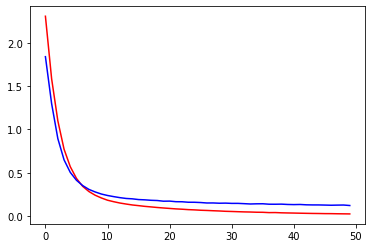

In [4]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

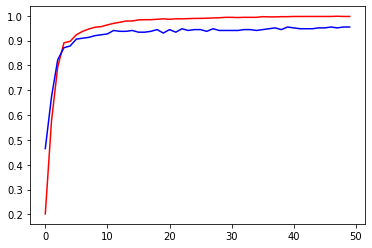

In [5]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [9]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


1437/1437 [==============================] - 0s 46us/step

	[Info] Accuracy of training data = 99.0%


In [10]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


360/360 [==============================] - 0s 61us/step

	[Info] Accuracy of testing data = 96.9%
